# **Thank You for opening this notebook!!!**
## **If you find this notebook useful then please upvote.**

# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
1. [Step 0: Imports and Reading data](#1)
2. [Step 1: data Understanding](#2)
3. [Step 2: data Prep](#3)
4. [Step 3: Feature Understanding](#4)
5. [Step 4: Feature Relationships](#5)
6. [Step 5: Analyse Hypothese](#6)
7. [Step 6: data Cleaning](#7)
8. [Step 7: Model Building (If Applicable):](#8)
9. [Step 8: Model Evaluation:](#9)
10. [Step 9: Make Pipline:](#10)
11. [Step 10: Feature Engineering:](#11)
12. [Step 11: Feature Scalling:](#12)

# [Step 0: Imports and Reading data]()<a id="1"></a> <br>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
plt.style.use('ggplot')

df = pd.read_csv('D:\Paractical data scientist\Diabetes Prediction ML\\diabetes.csv')
df = df.copy()

# [Step 1: data Understanding]()<a id="2"></a> <br>
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns : (150, 5)

In [80]:
df.drop_duplicates(inplace = True)
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [81]:
df.shape  

(768, 9)

In [82]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [83]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Axes: ylabel='proportion'>

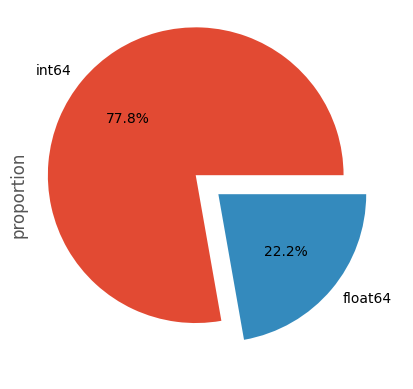

In [84]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', explode =(0.2,0))

# [Step 2: data Preperation]()<a id="3"></a> <br>
- Dropping irrelevant columns and rows

In [85]:
for col in df.columns:
    if len(df[col].unique()) == 1 :
        print("we drop "+col+" : Observing Unique Values")
        df.drop([col], axis=1, inplace=True)

- - Cleaning Column 

In [86]:
for col in df.select_dtypes(include=['float','int']):
    print(f'{col :-<40} {df[col].median()}')

Pregnancies----------------------------- 3.0
Glucose--------------------------------- 117.0
BloodPressure--------------------------- 72.0
SkinThickness--------------------------- 23.0
Insulin--------------------------------- 30.5
BMI------------------------------------- 32.0
DiabetesPedigreeFunction---------------- 0.3725
Age------------------------------------- 29.0
Outcome--------------------------------- 0.0


In [87]:
df['Outcome']=df['Outcome'].apply(lambda x: str("sick") if x==1 else "Not sick")

In [88]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) <= 20 :
        print(f'{col :-<40} {df[col].unique()}')

Outcome--------------------------------- ['sick' 'Not sick']


- - visualisation val missing : (visualisation of array[True, False] in order to detect nan(% of emptying))

<Axes: >

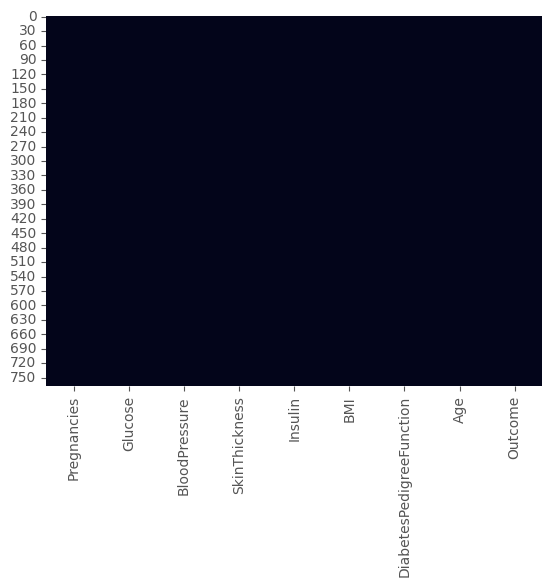

In [89]:
sns.heatmap(df.isna(), cbar=False) 

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

<Axes: ylabel='proportion'>

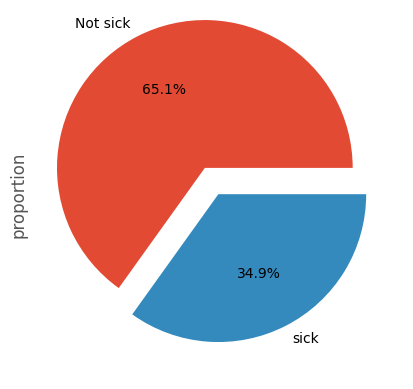

In [90]:
df['Outcome'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', explode =(0.2,0))

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

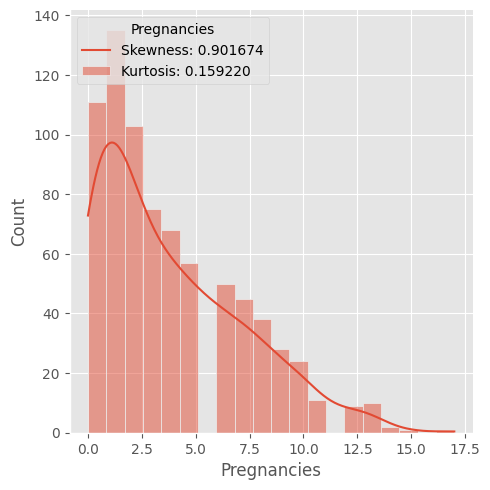

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

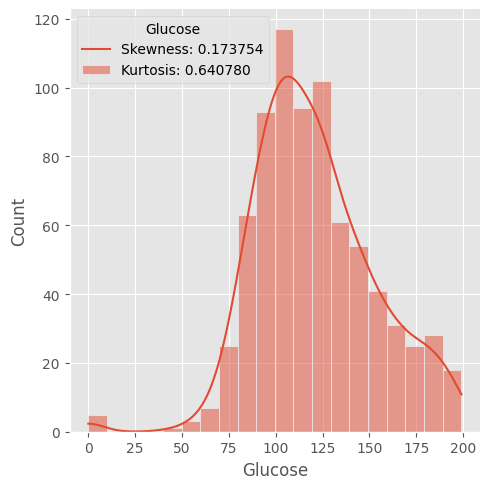

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

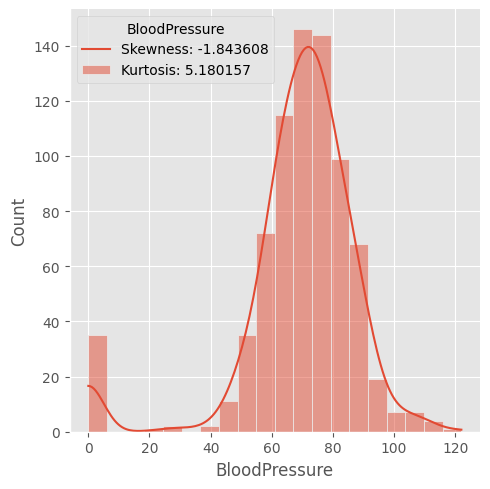

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

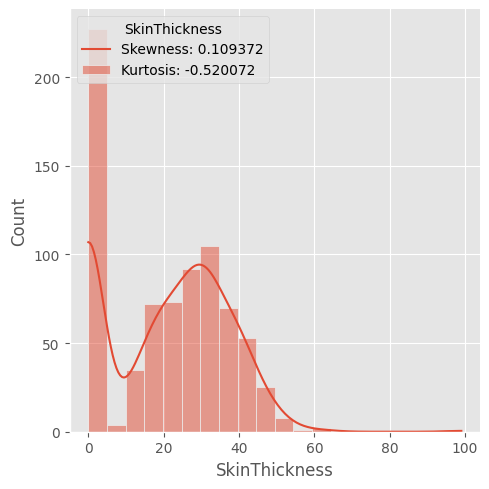

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

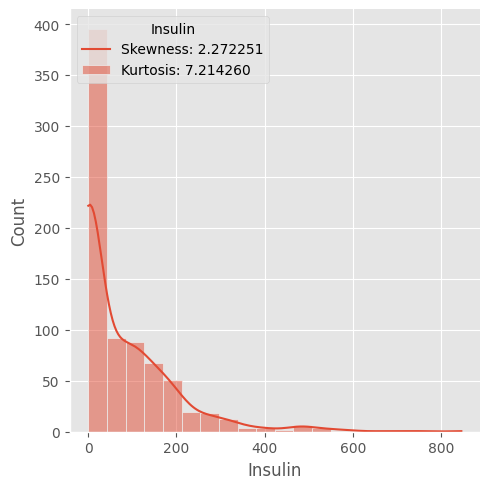

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

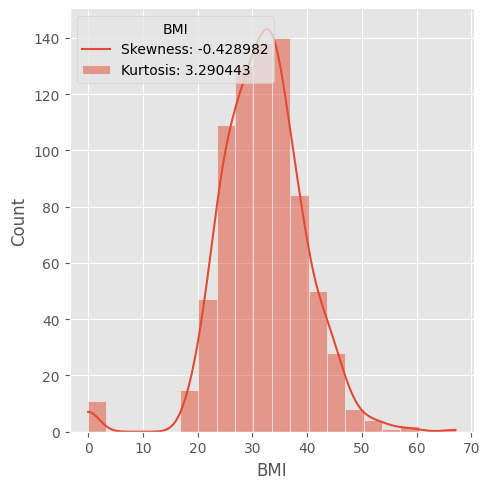

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

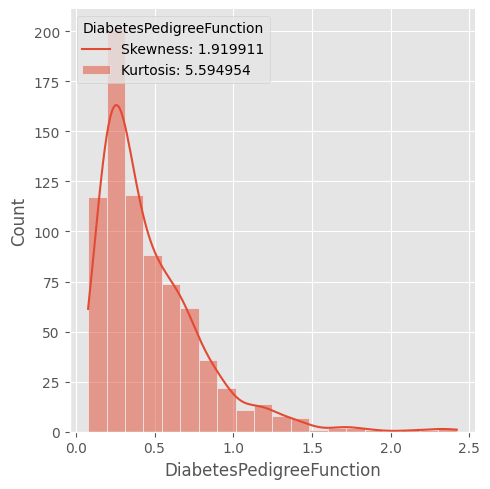

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 600x500 with 0 Axes>

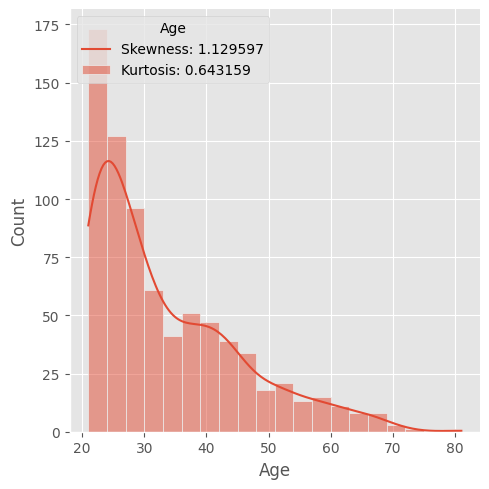

In [91]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title=col, loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Outcome------------------------------------------- ['sick' 'Not sick']


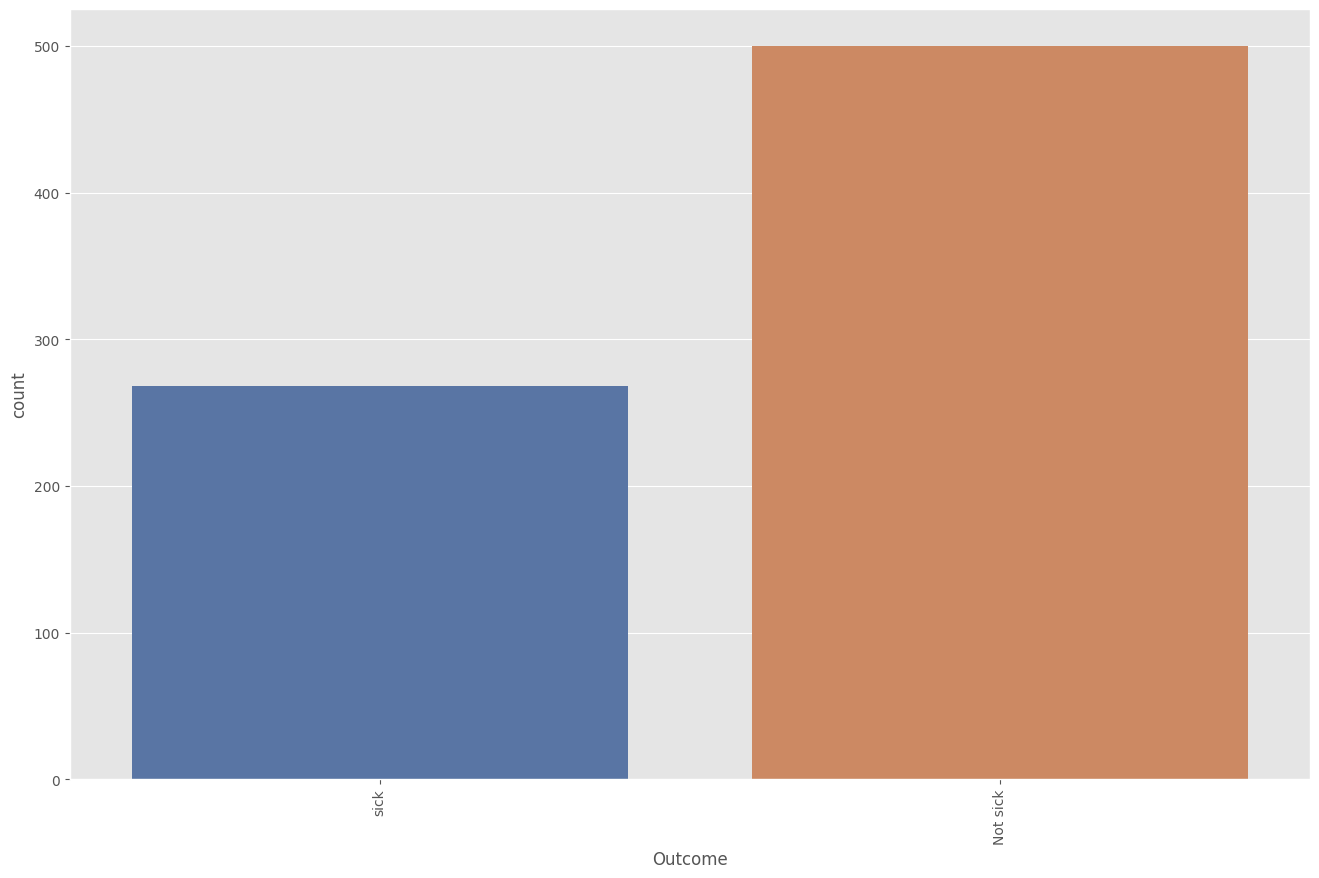

In [92]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    plt.figure(figsize = (16,10))
    ax = sns.countplot(x=df[col], hue=df[col], palette='deep')
    ax.legend().set_visible(False)
    plt.xticks(rotation=90)
    plt.show()

- - Verifie outliers

In [93]:
df = df[(df['BloodPressure']>20)]
df = df[(df['Glucose']>25)]
df.shape

(728, 9)

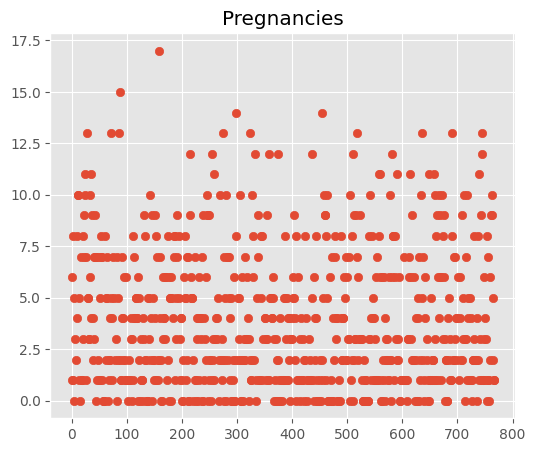

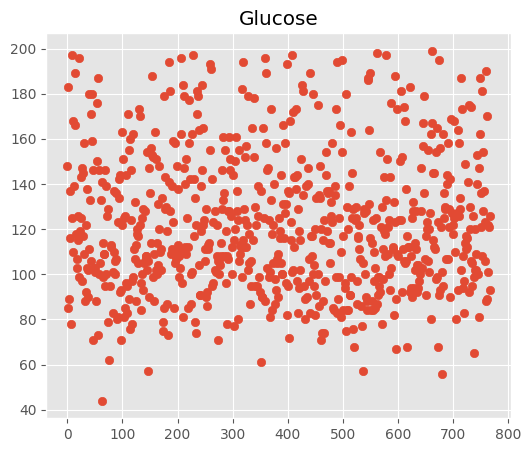

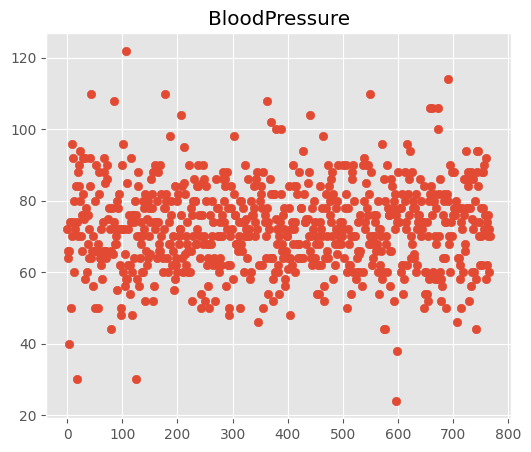

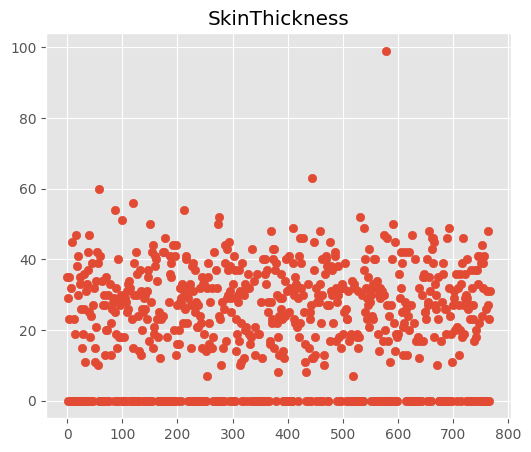

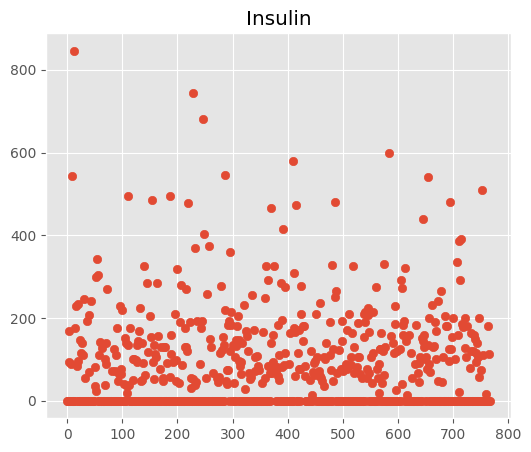

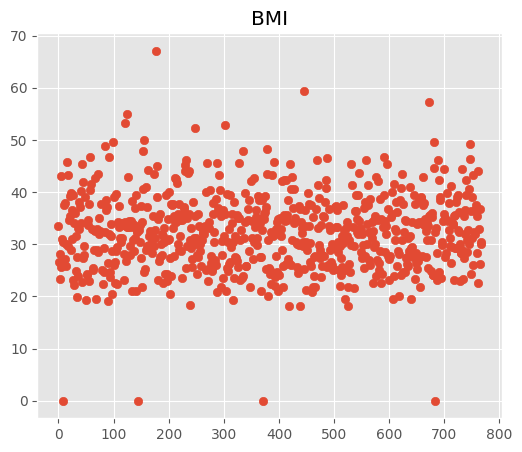

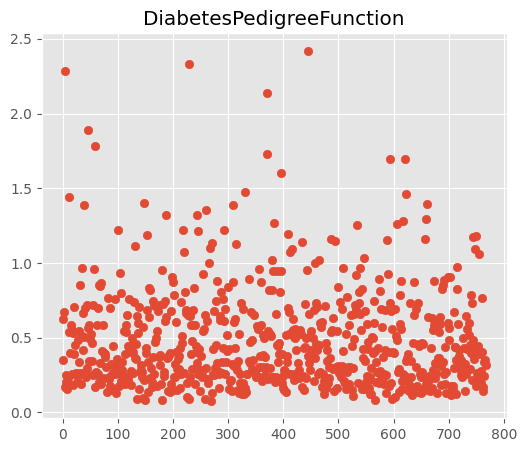

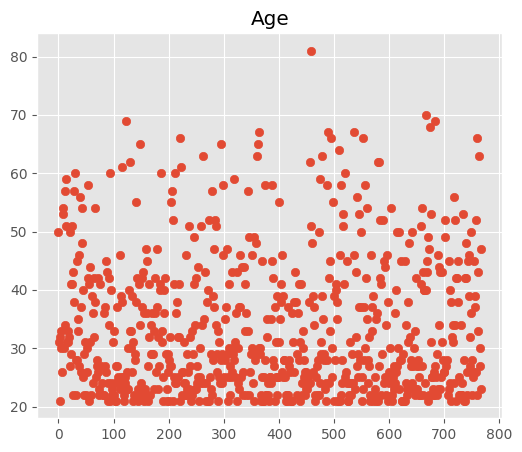

In [94]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = plt.scatter(df.index, df[col])
    plt.title(col)
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

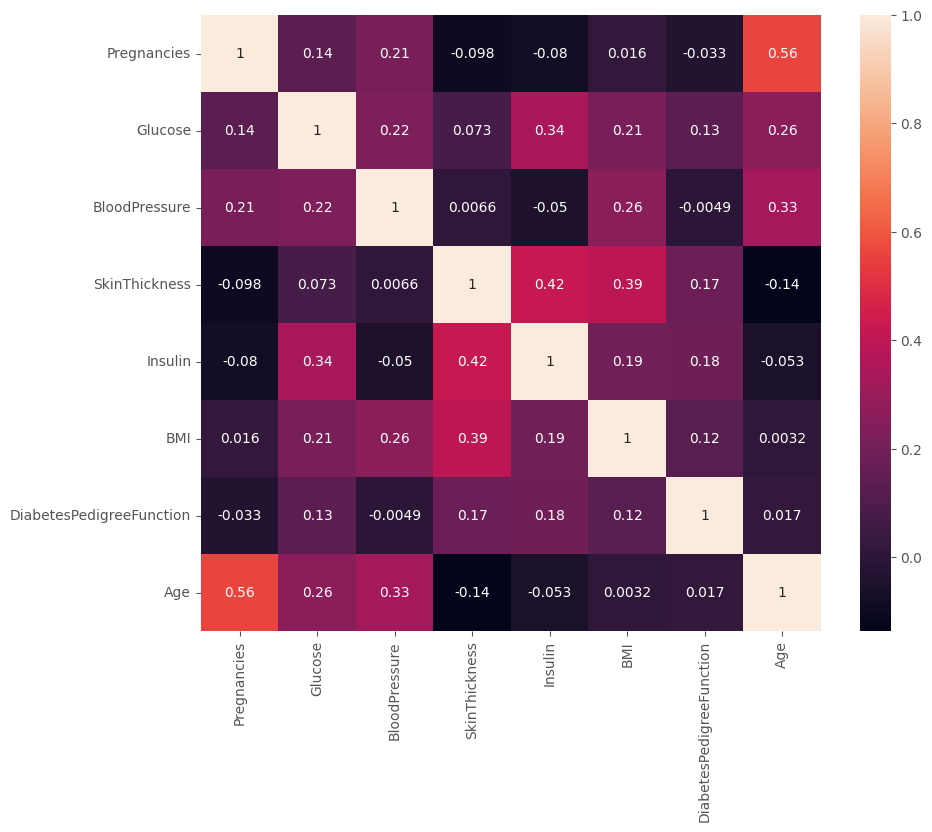

In [95]:
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True )

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



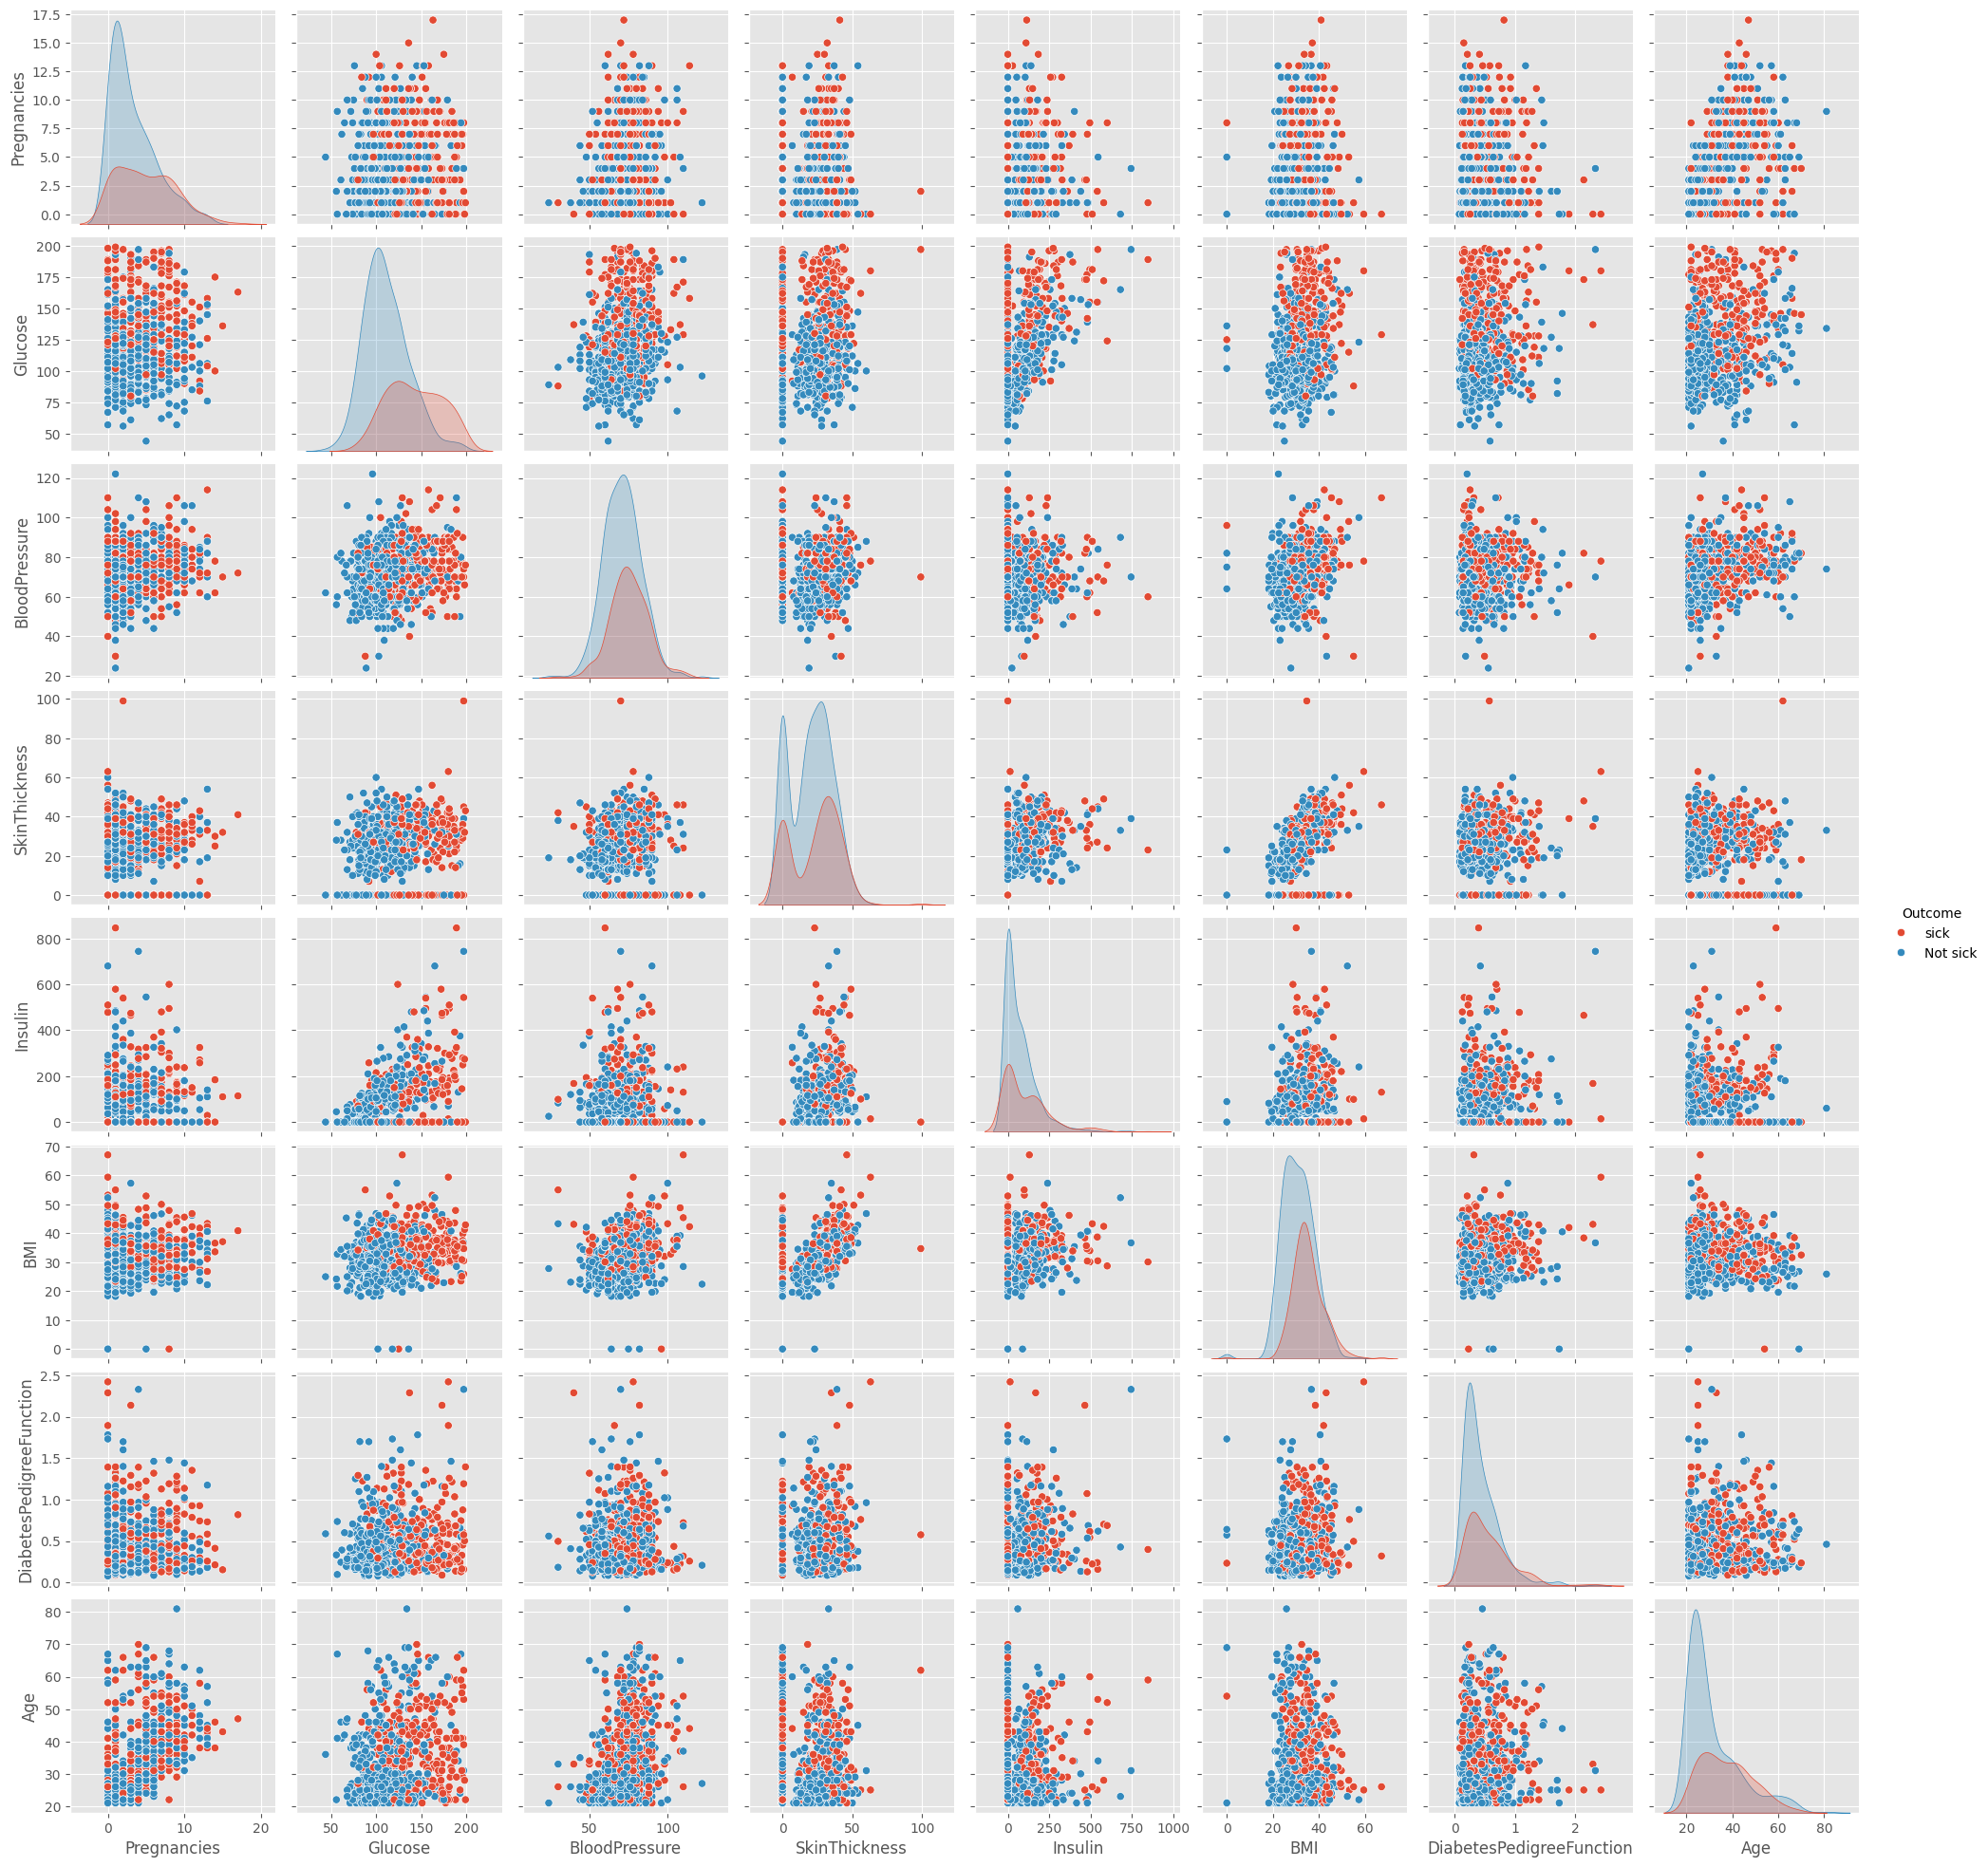

In [96]:
sns.pairplot(df, hue='Outcome')
plt.show()

- - Relation Target/Variables : (Taux corr variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

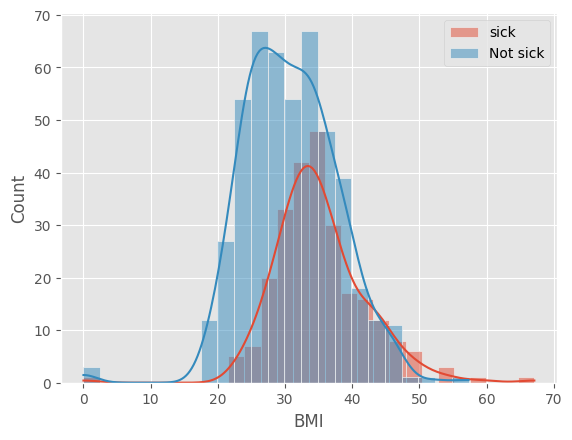

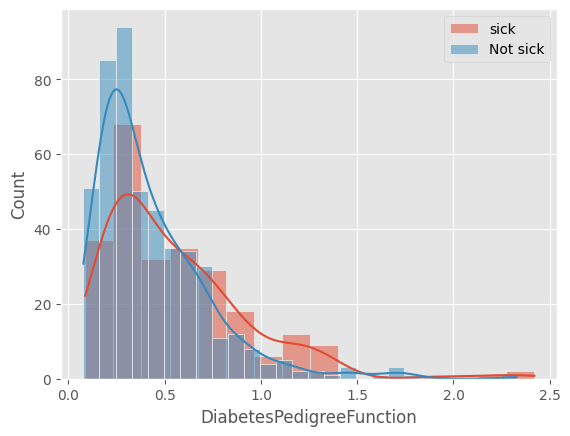

In [97]:
for col in df.select_dtypes(exclude=['object','int']):
    plt.figure()                                 
    for cat in df['Outcome'].unique():
        sns.histplot(df[df['Outcome']==cat][col],kde=True,label=cat)
    plt.legend()

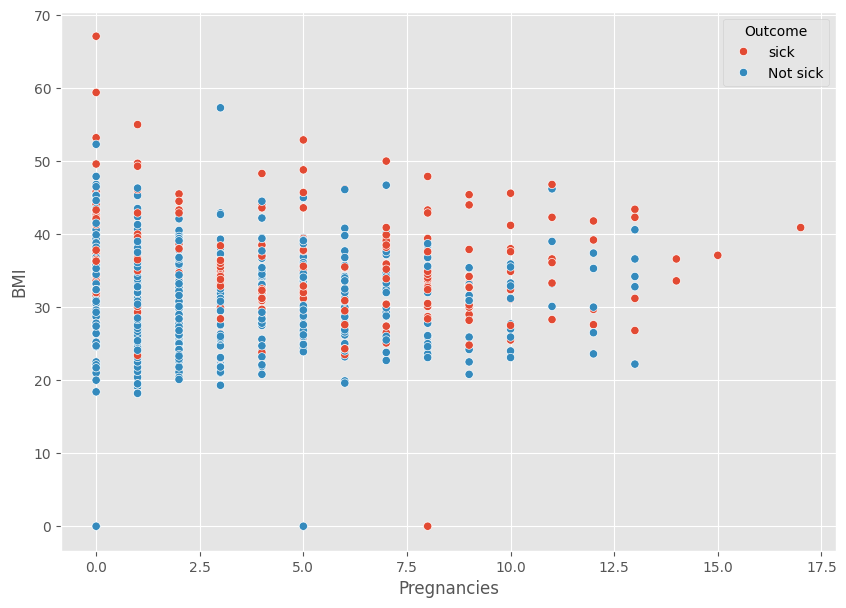

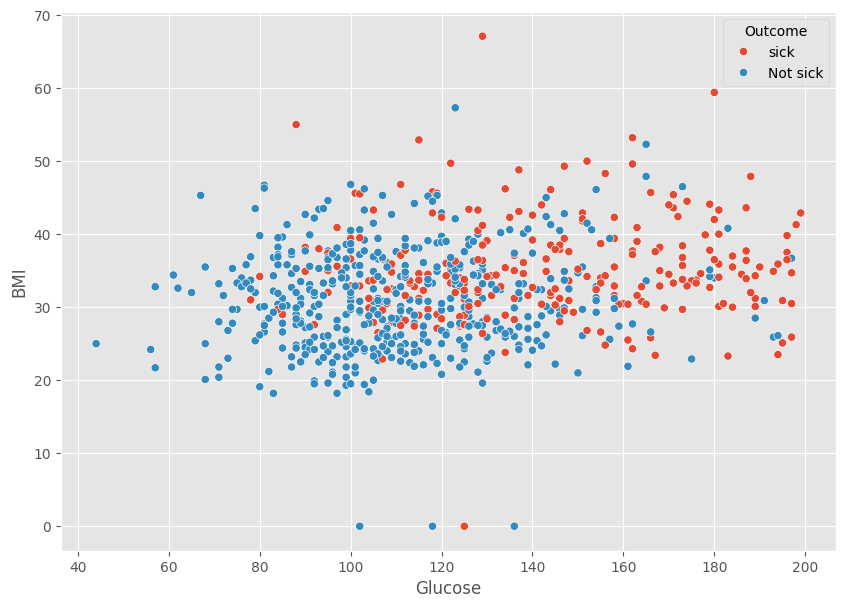

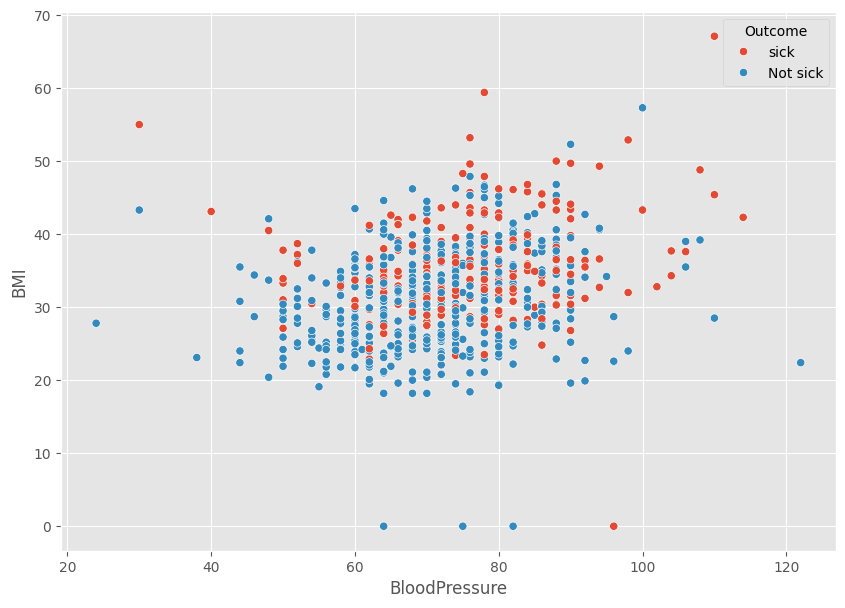

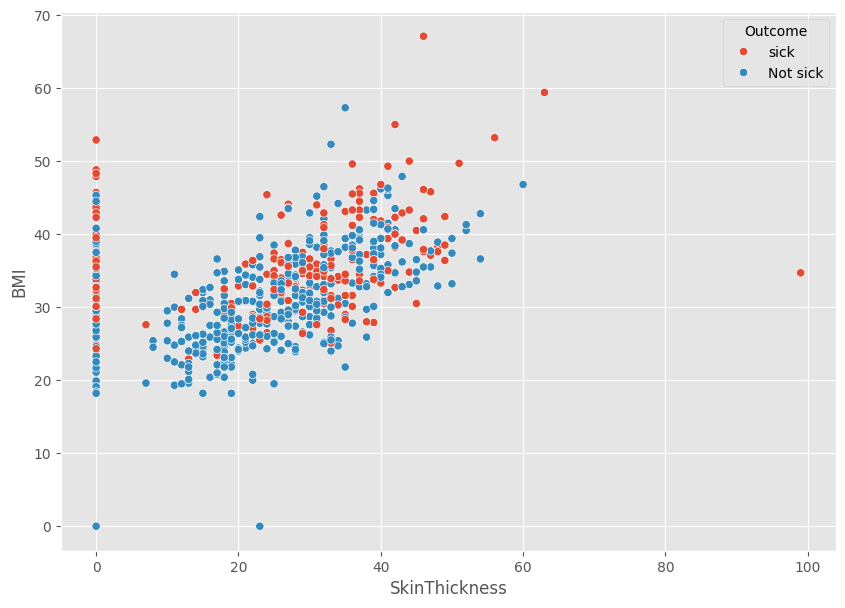

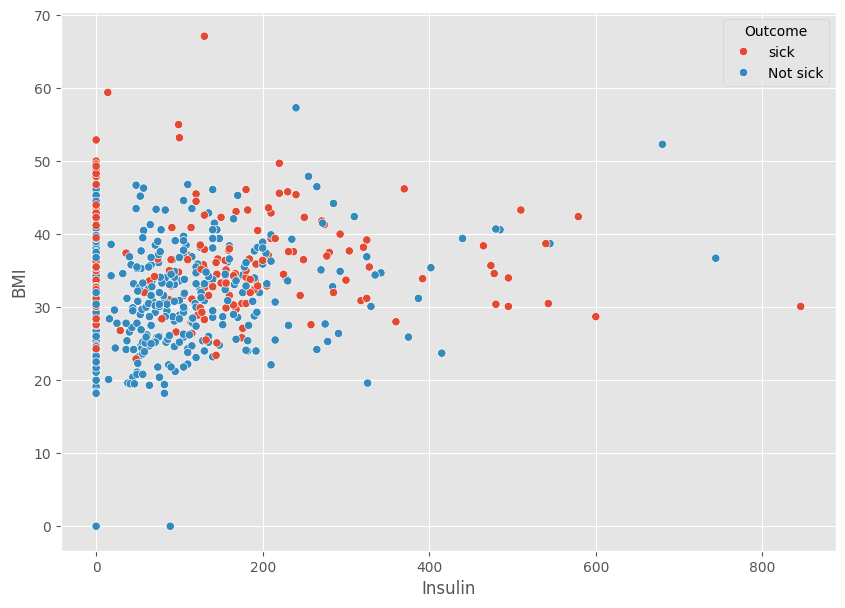

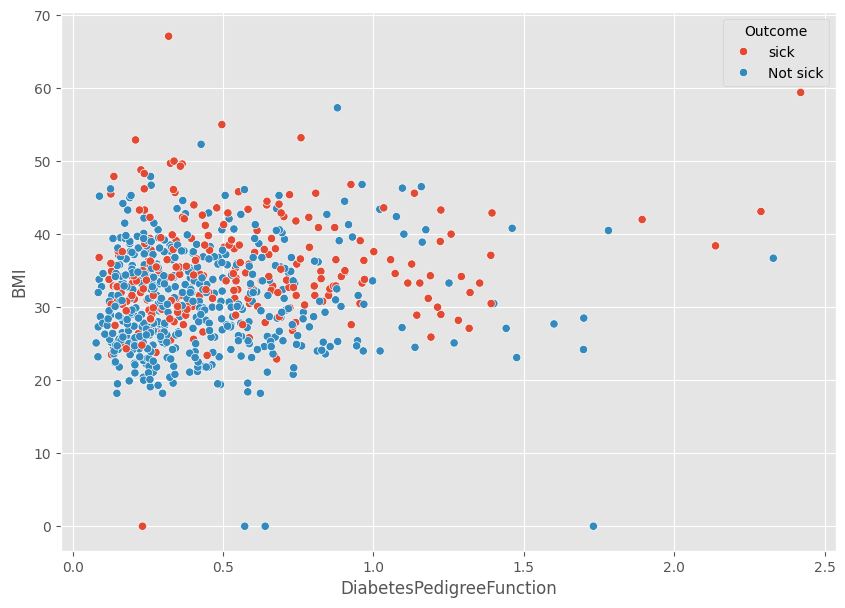

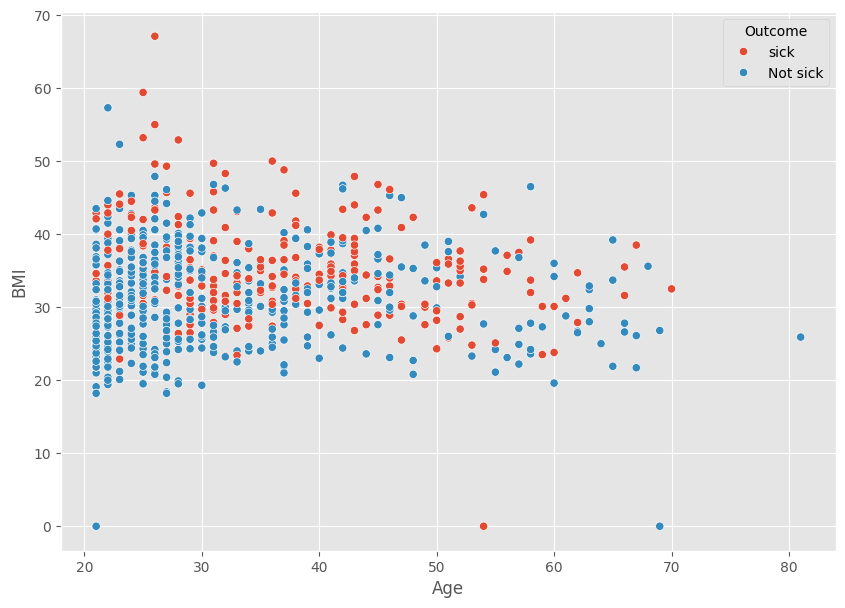

In [98]:
for col in df.select_dtypes(include=['float64','int']):  
    if col != 'BMI' :
        plt.figure(figsize=(10,7))
        sns.scatterplot(x=col, y='BMI',hue=df['Outcome'], data=df)
        plt.show()

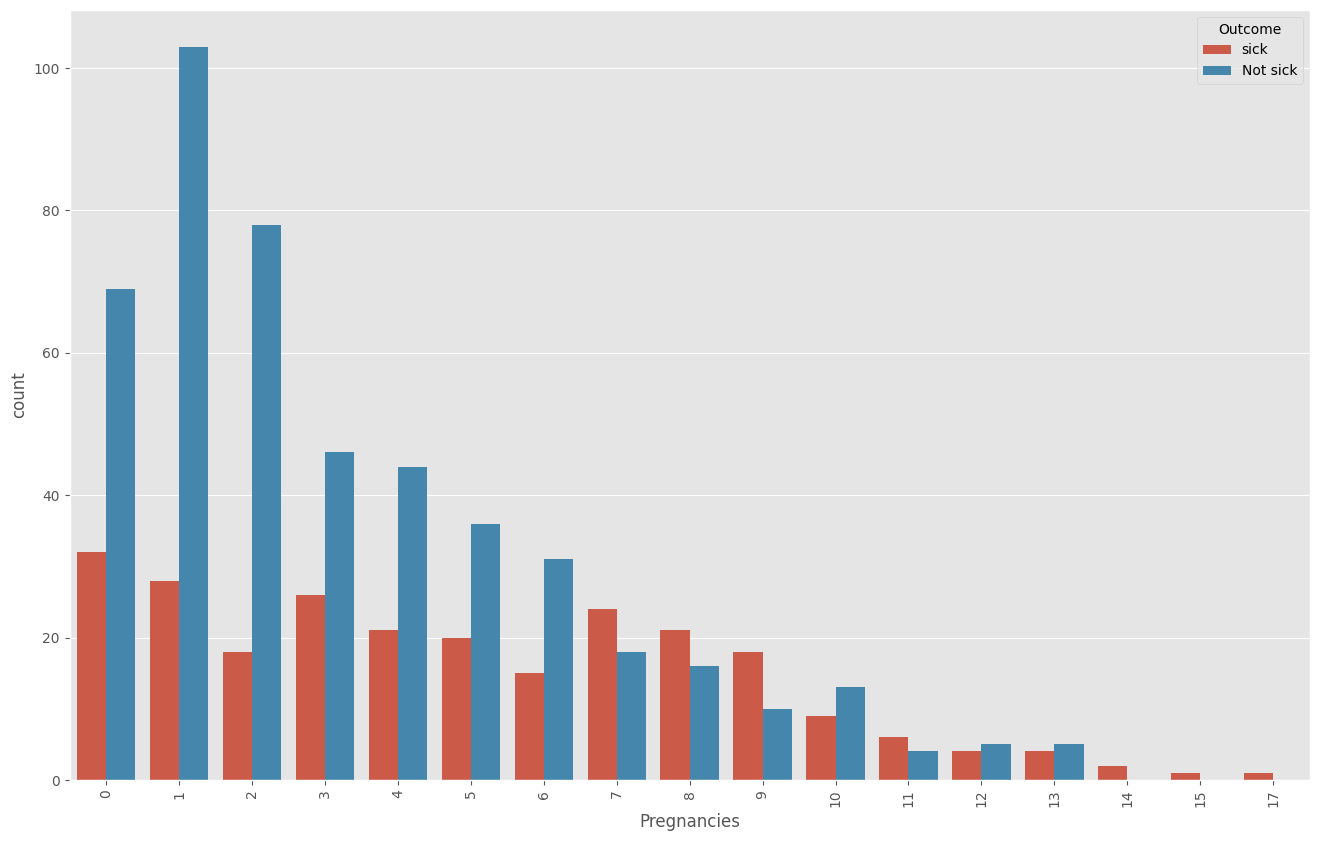

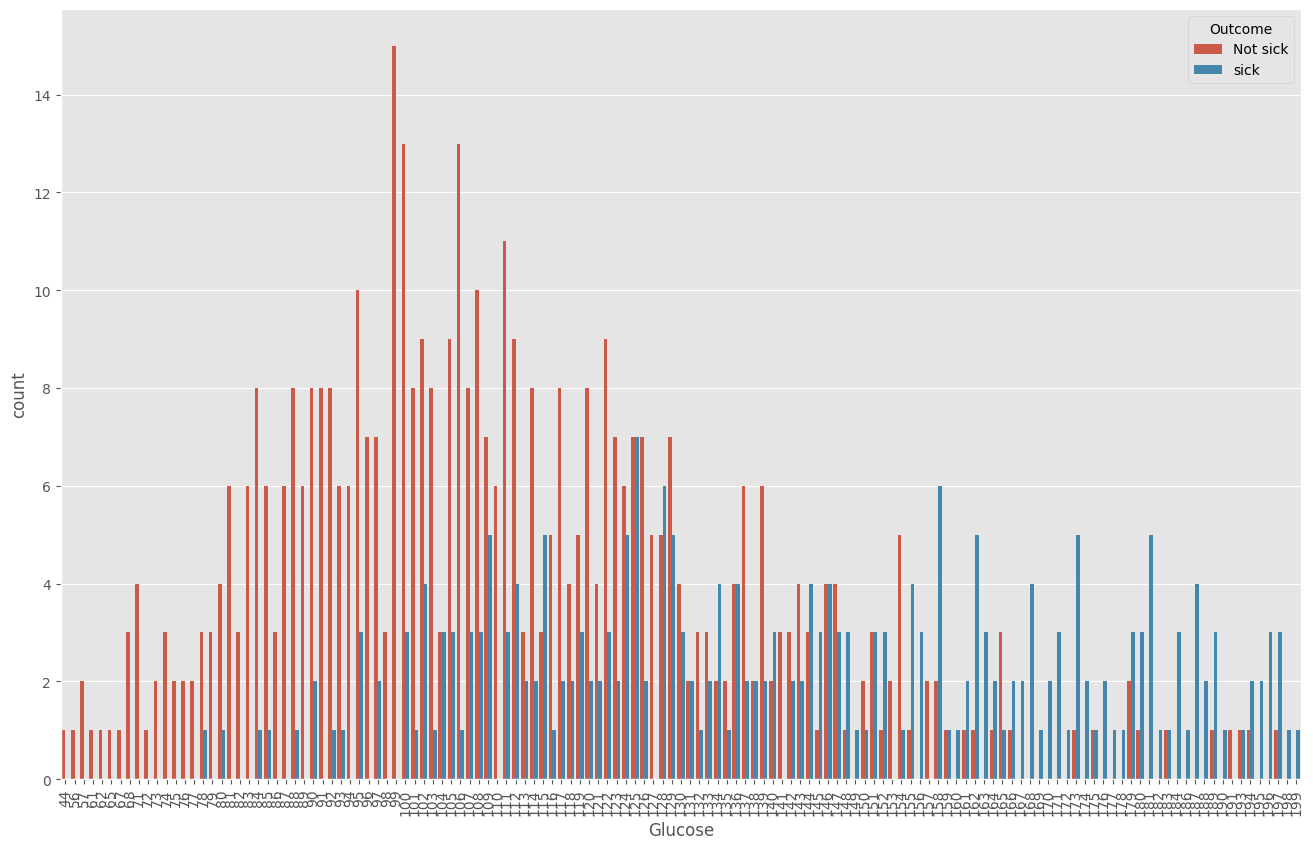

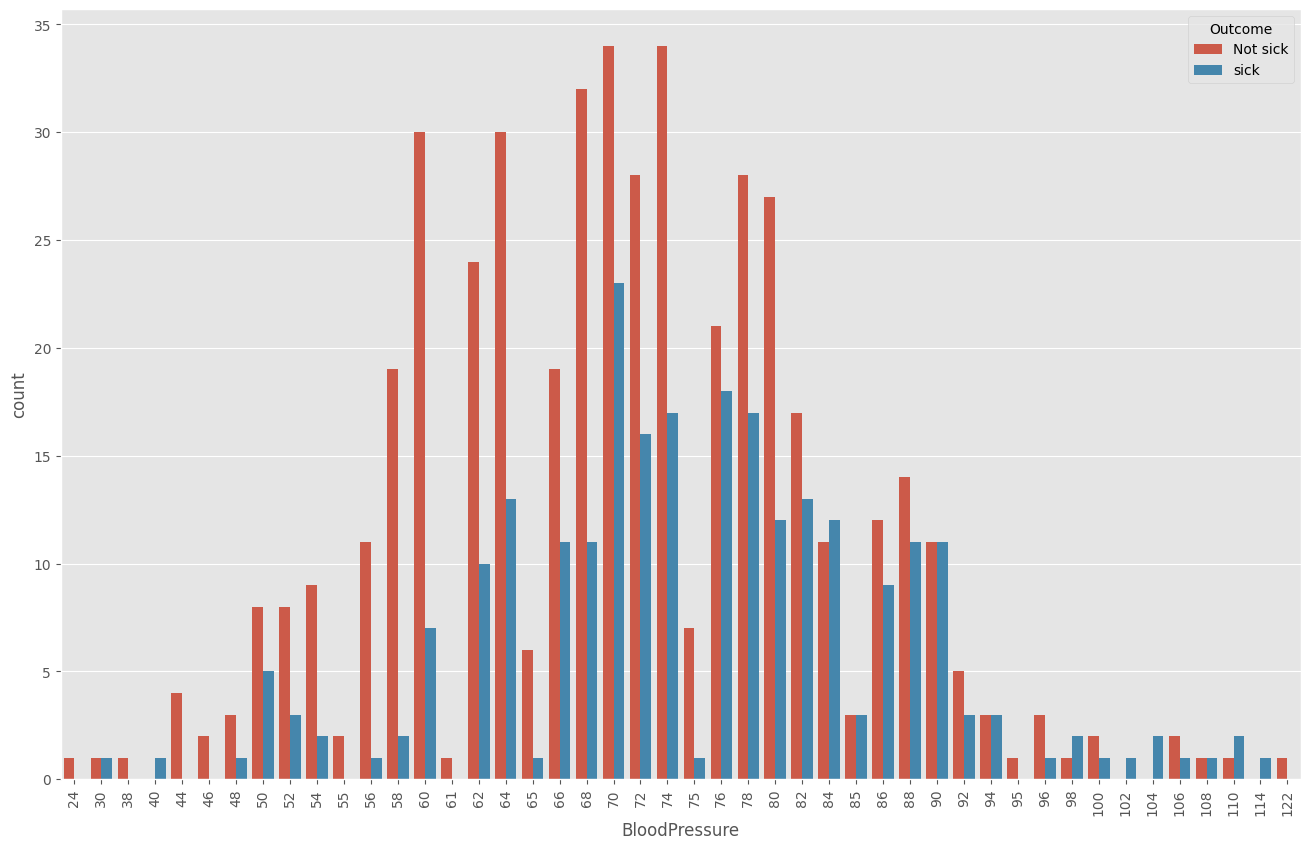

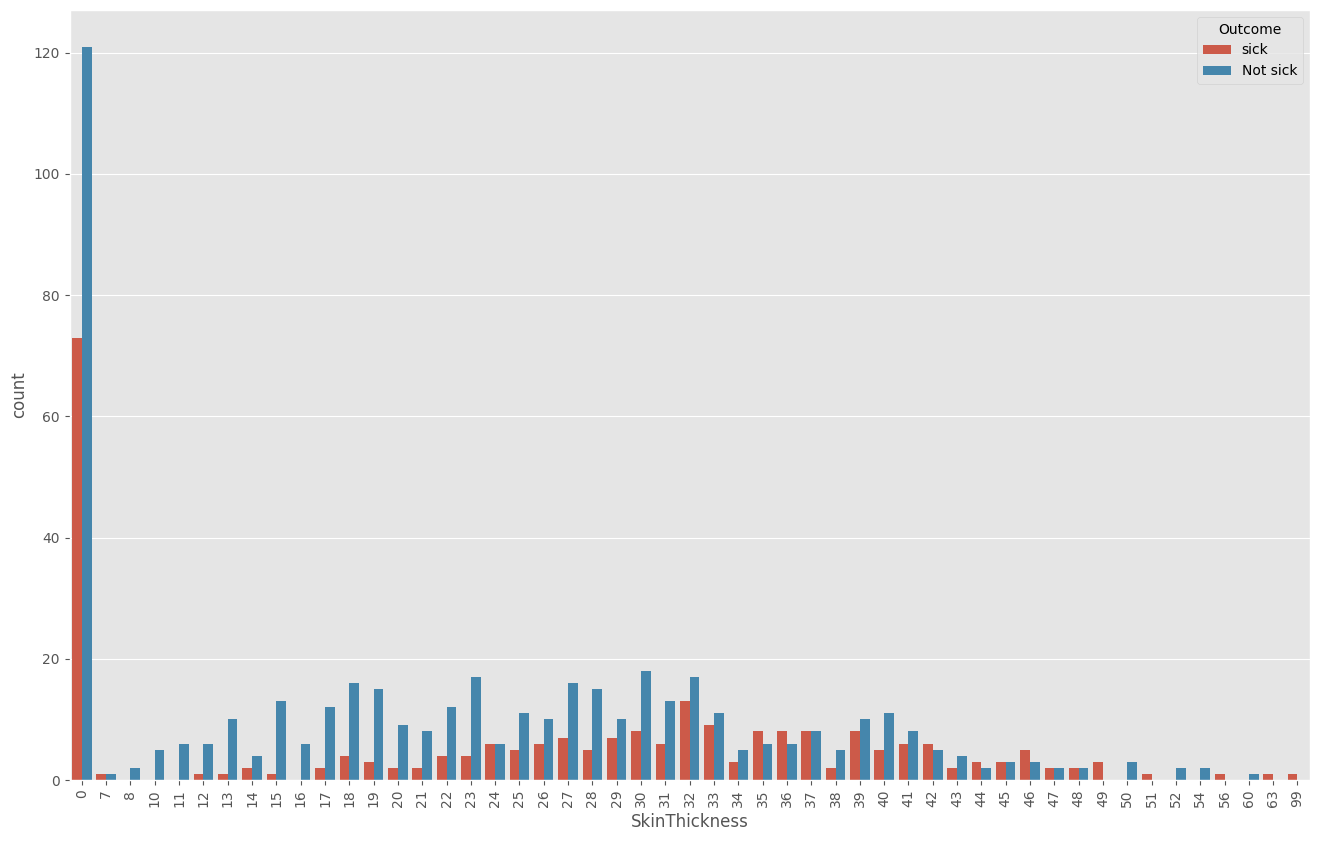

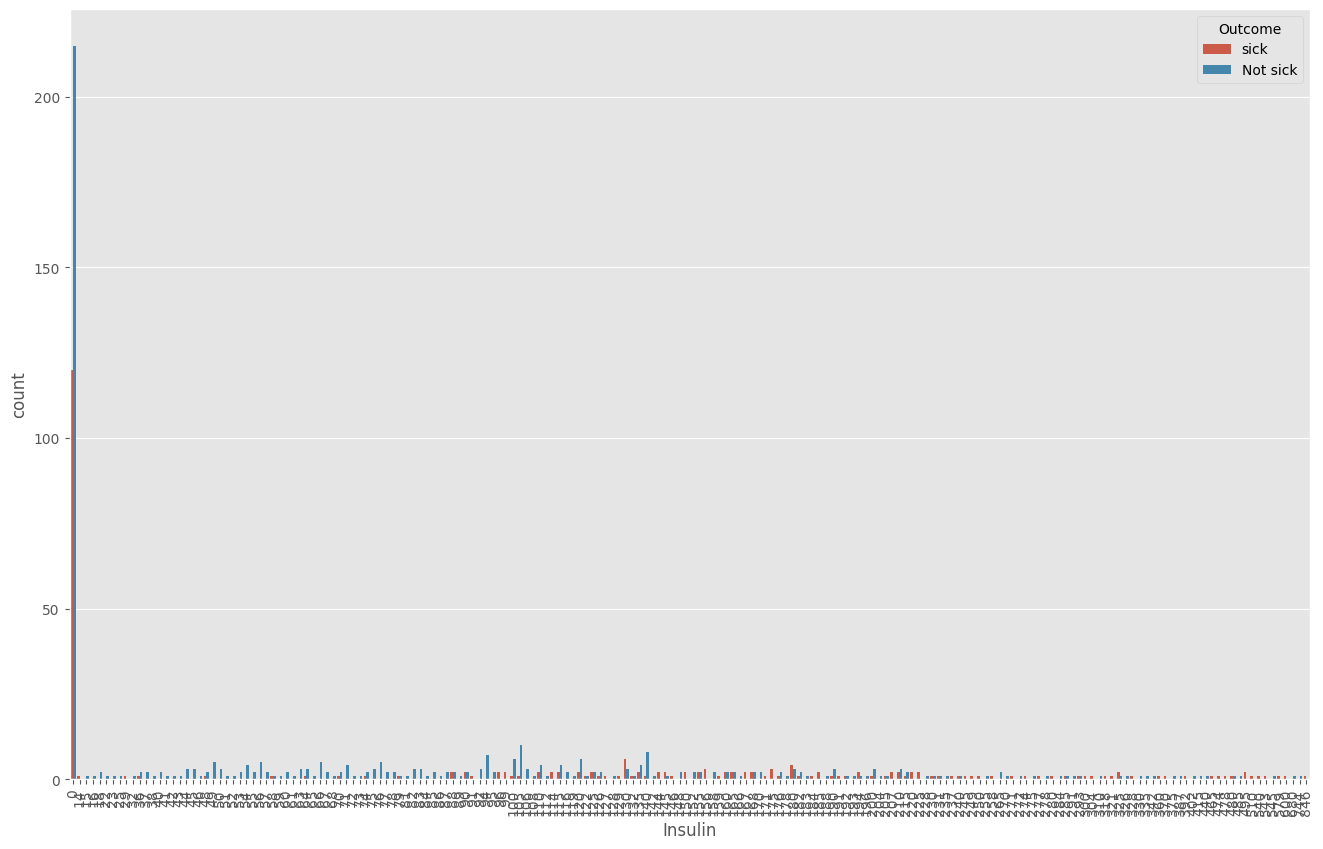

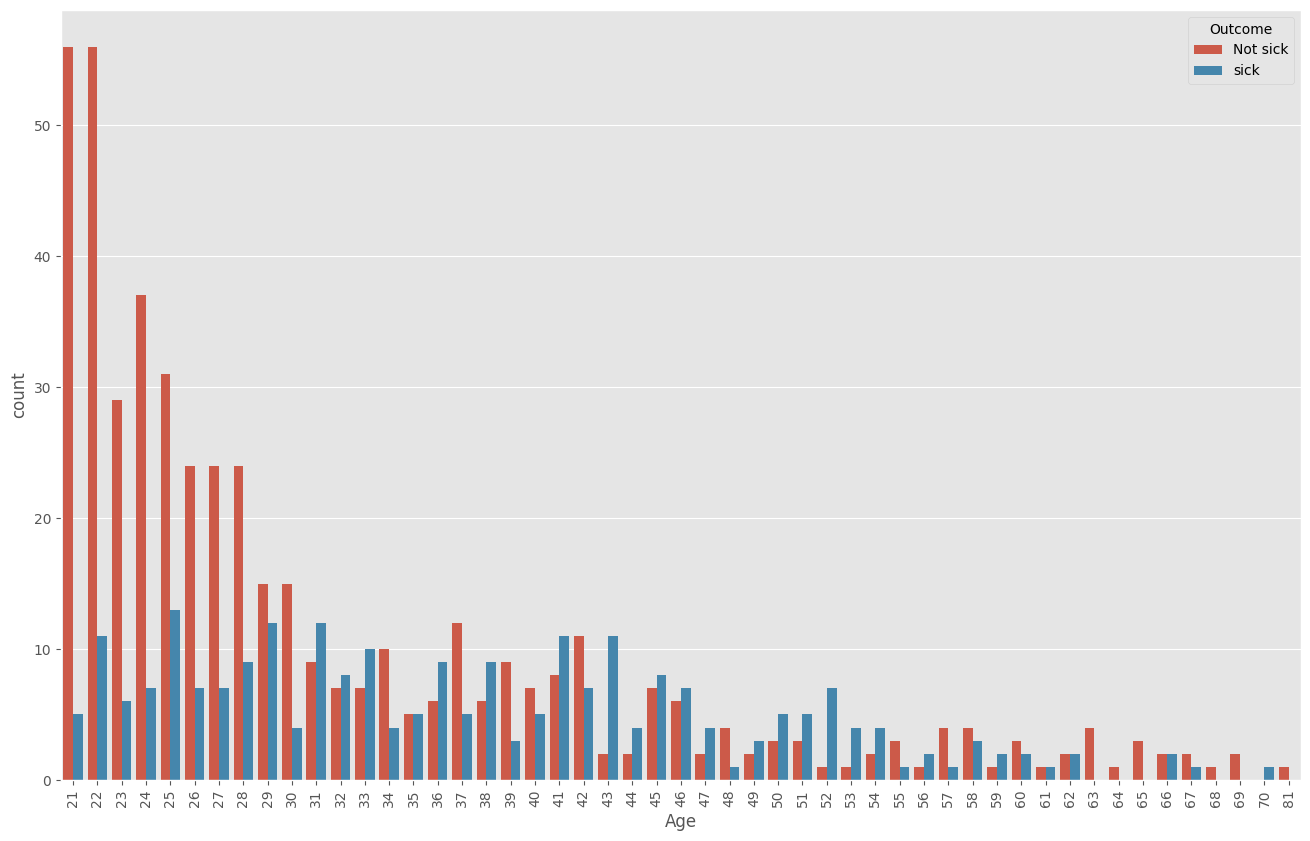

In [99]:
for col in df.select_dtypes(include=['int']):
    plt.figure(figsize = (16,10))
    ax = sns.countplot(data=df, x=col,hue=df['Outcome'])  
    plt.xticks(rotation=90)
    plt.show        

- - Relation Column/Column : 

([0, 1], [Text(0, 0, 'sick'), Text(1, 0, 'Not sick')])

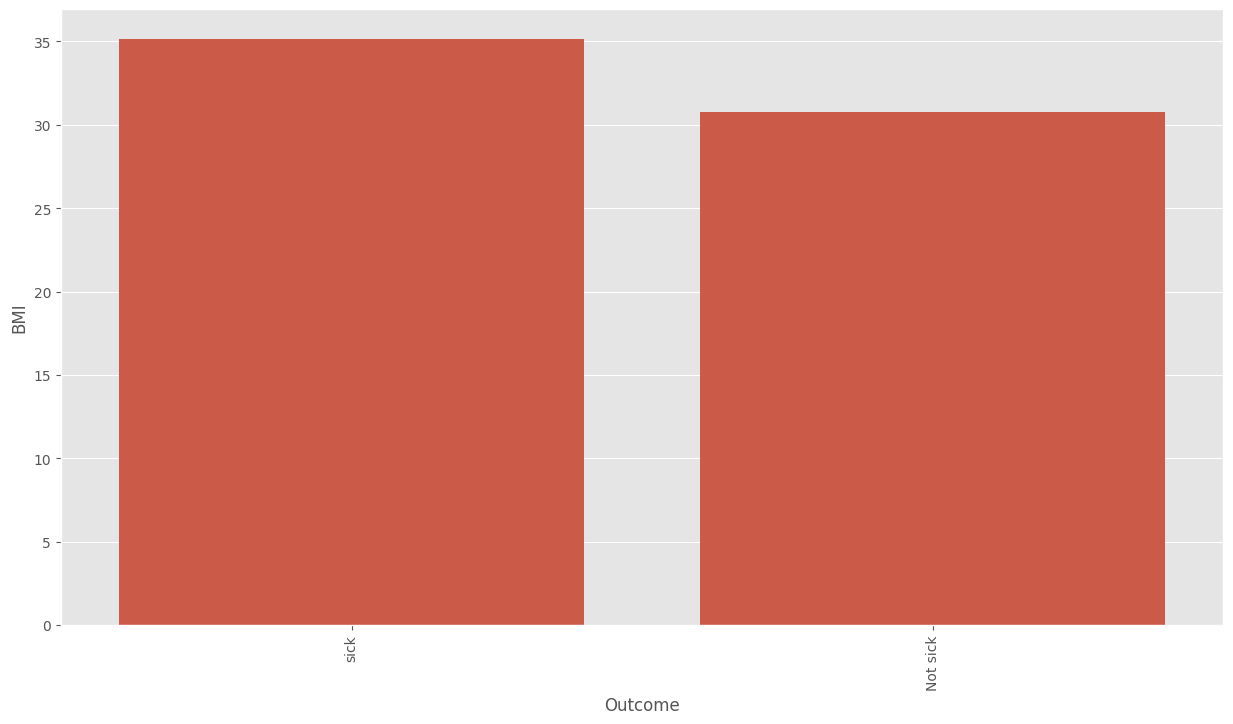

In [100]:
df2 = df[['Outcome', 'BMI']]
df3 = df2.groupby(['Outcome'])['BMI'].mean()  
df3 = df3.to_frame()
df3 = df3.sort_values('BMI', ascending=False)# 
df3
plt.figure(figsize = (15,8))
sns.barplot(df3['BMI'])
plt.xticks(rotation = 90)

In [101]:
bins = (21, 29, 81)
group_names = ['<30', '>30']
df['statut'] = pd.cut(df['Age'], bins = bins, labels = group_names)

sick_sum = df[(df['statut'] =='>30')&(df['Outcome']=='sick')]['Outcome'].count()
sick_percent = df[(df['Outcome']=='sick')]['Outcome'].count()
Not_sick_sum = df[(df['statut'] =='>30')&(df['Outcome']=='Not sick')]['Outcome'].count()
Not_sick_percen=df[(df['Outcome']=='Not sick')]['Outcome'].count()

total = pd.DataFrame([sick_sum,Not_sick_sum], columns=['Total']).rename(index={0: 'sick>30', 1: 'Not sick>30'})
percent = pd.DataFrame([(sick_sum/sick_percent)*100,(Not_sick_sum/Not_sick_percen)*100], columns=['percent']).rename(index={0: 'sick>30', 1: 'Not sick>30'})

Data = pd.concat([total, percent], axis=1)
Data

Total    percent
sick>30        173  69.200000
Not sick>30    182  38.075314

In [107]:
df.drop(['statut'], axis=1, inplace=True)

# [Step 5: Analyse Hypothese]()<a id="6"></a> <br>

- - Rate of 'columns_y' depending to each col => prove if the rate of 'column_y' are not equal

In [109]:
# calculate p for each column of test => compare p with alpha
from scipy.stats import ttest_ind                                                            
def t_test(col):
    alpha=0.02
    #=>array[True, False]           
    index_A=df['Outcome']=="sick"
    index_B=df['Outcome']=="Not sick"    
    #=>Data_A=Data[rows['column_y']==A] 
    if pd.api.types.is_numeric_dtype(df[col]):
        Data_A = df[index_A]
        Data_B = df[index_B]
        # dropna for eliminating NaN values for the test
        stat, p = ttest_ind(Data_A[col].dropna(), Data_B[col].dropna())                           
        if p < alpha:
            return 'H0 Rejected X'  # col has a rate not equal for 'column_y' => col has an impact on column_y
        else:
            return 'H0 Not Rejected'  # col has no significant impact on column_y
    else:
        return 'Not Numeric'  # The column is not numeric   

for col in df.columns:
    print(f'{col :-<50} {t_test(col)}')

Pregnancies--------------------------------------- H0 Rejected X
Glucose------------------------------------------- H0 Rejected X
BloodPressure------------------------------------- H0 Rejected X
SkinThickness------------------------------------- H0 Rejected X
Insulin------------------------------------------- H0 Rejected X
BMI----------------------------------------------- H0 Rejected X
DiabetesPedigreeFunction-------------------------- H0 Rejected X
Age----------------------------------------------- H0 Rejected X
Outcome------------------------------------------- Not Numeric


# [Step 6 : Data Cleaning]()<a id="7"></a> <br>

- Encodage : (Only for object column)

In [110]:
from sklearn.preprocessing import LabelEncoder
def encodage(data):
    cod_dict = {}
    for col in data.select_dtypes('object'):
        cod_dict[col] = LabelEncoder()
        print(cod_dict.keys())
        print('classed found : ' , list(cod_dict[col].fit(data[col]).classes_))
        #Create a label (category) encoder object
        data[col] = cod_dict[col].fit_transform(data[col])
        print('Updates dataframe is : \n' ,data )
    #for inverse transform not important
    # data['score0'] = cod_dict['score0'].inverse_transform(data['score0'])         
    # print('Inverse Transform  : \n' ,data)
    return data

- - Train_test_split

([<matplotlib.patches.Wedge at 0x1d887091180>,
 [Text(-1.0504016040886894, 0.7659350299652761, 'Data_train'),
  Text(0.8888014179852054, -0.6480987882934888, 'Data_test')],
 [Text(-0.6464009871315011, 0.47134463382478525, '79.9%'),
  Text(0.4848007734464756, -0.35350842997826654, '20.1%')])

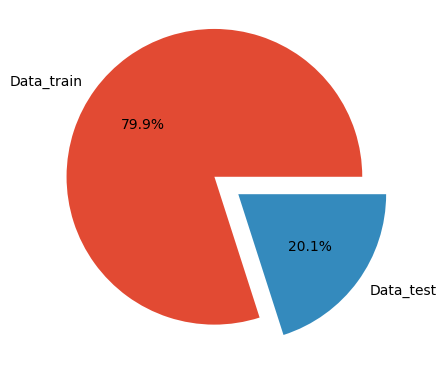

In [111]:
from sklearn.model_selection import train_test_split
Data_train , Data_test = train_test_split(df, test_size=0.2, random_state=0)
#chek if train_size==1-0.2 of all rows
plt.pie((Data_train.shape[0],Data_test.shape[0]), labels=('Data_train', 'Data_test'), autopct='%1.1f%%', explode =(0.2,0))

In [112]:
from sklearn.preprocessing import StandardScaler
def prep(data):
    # only for column object use it
    data = encodage(data)   
    # alwayse use it
    X = data.drop('Outcome',axis=1)
    y = data['Outcome']
    # only for target classification
    print(y.value_counts())
    return X,y
X_train, y_train = prep(Data_train)
X_test, y_test = prep(Data_test)

dict_keys(['Outcome'])
classed found :  ['Not sick', 'sick']
Updates dataframe is : 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
524            3      125             58              0        0  31.6   
507            1      130             60             23      170  28.6   
254           12       92             62              7      258  27.6   
19             1      115             70             30       96  34.6   
285            7      136             74             26      135  26.0   
..           ...      ...            ...            ...      ...   ...   
747            1       81             74             41       57  46.3   
202            0      108             68             20        0  27.3   
666            4      145             82             18        0  32.5   
592            3      132             80              0        0  34.4   
724            1      111             94              0        0  32.8   

     DiabetesPedigreeFunc

# [Step 7: Model Building (If Applicable):]()<a id="8"></a> <br>

- Train the model

In [113]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# [Step 8: Model Evaluation:]()<a id="9"></a> <br>
- Evaluate the model's performance on the testing set using relevant metrics.

In [114]:
score = model.score(X_test,y_test)
print(score)
y_pred = model.predict(X_test)

0.6712328767123288


accuracy_score :  0.6712328767123288
confusion_matrix :  [[79 27]
 [21 19]]
f1_score :  0.6712328767123288
classification_report :                precision    recall  f1-score   support

           0       0.79      0.75      0.77       106
           1       0.41      0.47      0.44        40

    accuracy                           0.67       146
   macro avg       0.60      0.61      0.60       146
weighted avg       0.69      0.67      0.68       146

recall_score :  [0.74528302 0.475     ]
precision_score :  [0.79       0.41304348]


<Axes: >

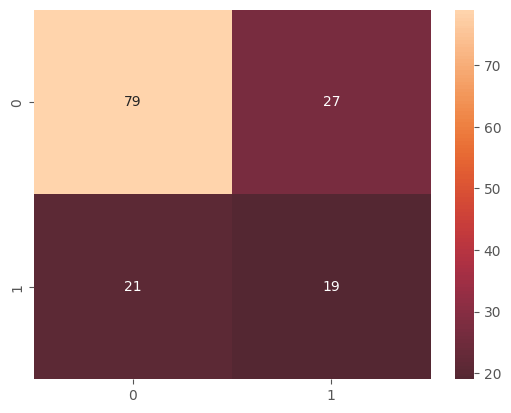

In [115]:
from sklearn.metrics import precision_score, accuracy_score,confusion_matrix, f1_score, recall_score, precision_recall_curve, classification_report

def scoring(y_test,y_pred):
    # Accuracy : acc= -((y-y_pred)**2/(y-y_mean)**2)  #this model describe in % the variation of y
    acc=accuracy_score(y_test, y_pred)        

    #best score is with Diagonal matrix   #visualisation of result               [[TP FP]
    cm = confusion_matrix(y_test, y_pred)                                        #[FN TN]]        

    # F1 Score : 2*(precision*recall)/(precision +recall) #average= can be : None,binary,micro,weighted,samples
    f1 = f1_score(y_test, y_pred, average='micro')         

    # Classification report :    #get (accuracy acc, score f1, cm)
    cr = classification_report(y_test,y_pred)

    # Recall Score : (Sensitivity) (TP / float(TP + FN)) == 1/1+2  #average= can be : None,binary,macro,weighted,samples
    rs = recall_score(y_test, y_pred, average=None)        

    # Precision Score : (Specificity) (TP / float(TP + FP))
    ps = precision_score(y_test, y_pred, average=None)
    return acc,cm,f1,cr,rs,ps

#compare (accuracy acc, score f1, cm)
scoring(y_test,y_pred)              
print("accuracy_score : " , scoring(y_test,y_pred)[0])
print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
print("f1_score : " , scoring(y_test,y_pred)[2] )
print("classification_report : " , scoring(y_test,y_pred)[3] )
print("recall_score : " , scoring(y_test,y_pred)[4] )
print("precision_score : " , scoring(y_test,y_pred)[5] )
#visualisation of result : best score is with Diagonal matrix
cm = scoring(y_test,y_pred)[1] 
sns.heatmap(cm, center=True, annot=True, fmt="d") 

# [Step 9: Make Pipline:]()<a id="10"></a> <br>

In [116]:
def prep2(data):
    # alwayse use it
    X = data.drop('Outcome',axis=1)
    y = data['Outcome']
    return X,y
X_train, y_train = prep2(Data_train)
X_test, y_test = prep2(Data_test)

In [117]:
from sklearn.preprocessing import PolynomialFeatures,RobustScaler, StandardScaler,OneHotEncoder
#MinMaxScaler,[Normalizer(copy=True, norm=''l1'or'max'')modif suivant row,MaxAbsScaler(copy=True)modif suivant columns,FunctionTransformer(func=fun1 or lambda x: x**0.1,validate = True),Binarizer(threshold = 1.0),
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, make_union

# Use of all models in order to eliminate overfitting => RadForst, AdBoost, SVM, KNN 
num_features = [col for col in df.select_dtypes(exclude=['object']) if col != 'Outcome']
categ_features = [col for col in df.select_dtypes(include=['object']) if col != 'Outcome']
#Eliminate nan val+StandardScaler
num_pipeline_norm = make_pipeline(KNNImputer(),RobustScaler())
#pas besoin de normalisation (RobustScaler()) (SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=-9)
num_pipeline = make_pipeline(KNNImputer())
# strategy = 'most_frequent',mean,median,constant with fill_value=-99
categ_pipeline = make_pipeline(KNNImputer(),OneHotEncoder())

preprocessor_norm = make_column_transformer((num_pipeline_norm,num_features),(categ_pipeline,categ_features))
preprocessor = make_column_transformer((num_pipeline,num_features),(categ_pipeline,categ_features))
#Model Classificat#=================================#=========================================
import xgboost as xgb
mod_XGB = make_pipeline(preprocessor_norm,PolynomialFeatures(),xgb.XGBClassifier())
from sklearn.linear_model import LogisticRegression,SGDClassifier
mod_LOG = make_pipeline(preprocessor_norm,PolynomialFeatures(),LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33))
mod_SGD = make_pipeline(preprocessor_norm,PolynomialFeatures(),SGDClassifier(random_state=0))
from sklearn.svm import SVC
mod_SVM = make_pipeline(preprocessor_norm,PolynomialFeatures(), SVC(random_state=0))         #must use Scaling standard => -1< X_train <1 & mean=0 & std=1
from sklearn.tree import DecisionTreeClassifier
mod_tree = make_pipeline(preprocessor_norm,PolynomialFeatures(), DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33))  
from sklearn.neighbors import KNeighborsClassifier
mod_KNN = make_pipeline(preprocessor_norm,PolynomialFeatures(), KNeighborsClassifier())      #Scaling MinMax => 1< X_train <0   
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
mod_RadForst = make_pipeline(preprocessor,PolynomialFeatures(),RandomForestClassifier(random_state=0))    
mod_Gradient = make_pipeline(preprocessor,PolynomialFeatures(),GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33) )  
mod_AdBoost = make_pipeline(preprocessor,PolynomialFeatures(),AdaBoostClassifier(random_state=0))

models = {'XGB':mod_XGB,'LOG':mod_LOG,'SGD':mod_SGD,'SVM':mod_SVM,'tree':mod_tree,'KNN':mod_KNN,'RadForst':mod_RadForst,'Gradient':mod_Gradient,'AdBoost':mod_AdBoost}
#Fitting Classificat#=================================#=========================================
accuracy_dict = {}
for nam, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Store accuracy in dictionary
    accuracy_dict[nam] = scoring(y_test, y_pred)[0]
    print('result of model nam : ' , nam)
    #compare (accuracy acc, score f1, cm)         
    print("accuracy_score : " , scoring(y_test,y_pred)[0])
    print("confusion_matrix : ",  scoring(y_test,y_pred)[1] )
    print("f1_score : " , scoring(y_test,y_pred)[2] )
    print("classification_report : " , scoring(y_test,y_pred)[3] )
    print("recall_score : " , scoring(y_test,y_pred)[4] )
    print("precision_score : " , scoring(y_test,y_pred)[5] )
# Find the model with the best accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
print(f"The best model is {best_model} with an accuracy of {accuracy_dict[best_model]}")

result of model nam :  XGB
accuracy_score :  0.7534246575342466
confusion_matrix :  [[86 20]
 [16 24]]
f1_score :  0.7534246575342466
classification_report :                precision    recall  f1-score   support

           0       0.84      0.81      0.83       106
           1       0.55      0.60      0.57        40

    accuracy                           0.75       146
   macro avg       0.69      0.71      0.70       146
weighted avg       0.76      0.75      0.76       146

recall_score :  [0.81132075 0.6       ]
precision_score :  [0.84313725 0.54545455]
result of model nam :  LOG
accuracy_score :  0.7465753424657534
confusion_matrix :  [[89 17]
 [20 20]]
f1_score :  0.7465753424657534
classification_report :                precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.54      0.50      0.52        40

    accuracy                           0.75       146
   macro avg       0.68      0.67      0.67       146


c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



precision_score :  [0.81651376 0.54054054]
result of model nam :  SGD
accuracy_score :  0.5068493150684932
confusion_matrix :  [[43 63]
 [ 9 31]]
f1_score :  0.5068493150684932
classification_report :                precision    recall  f1-score   support

           0       0.83      0.41      0.54       106
           1       0.33      0.78      0.46        40

    accuracy                           0.51       146
   macro avg       0.58      0.59      0.50       146
weighted avg       0.69      0.51      0.52       146

recall_score :  [0.40566038 0.775     ]
precision_score :  [0.82692308 0.32978723]
result of model nam :  SVM
accuracy_score :  0.7602739726027398
confusion_matrix :  [[92 14]
 [21 19]]
f1_score :  0.7602739726027399
classification_report :                precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.58      0.47      0.52        40

    accuracy                           0.76       146
   macro av

0.7749763816721776
{'polynomialfeatures__degree': 2}


<Axes: >

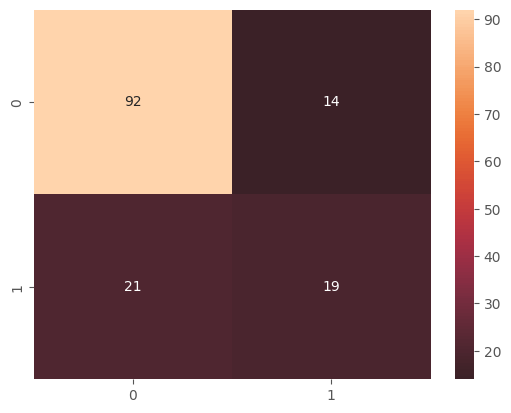

In [119]:
# Optimisation(hyperparametres) GridSearch :#=============================#========================
from sklearn.model_selection import GridSearchCV #or RandomizedSearchCV
hyper_params = {'polynomialfeatures__degree':[2,3,4]}          
grid = GridSearchCV(mod_SVM, hyper_params,cv=4).fit(X_train,y_train)    #cv=3ou4ou5 == ndr of split
# grid = RandomizedSearchCV(mod_SVM, hyper_params, scoring='recall',cv=4, n_iter=40).fit(X_train,y_train)   #n_iter == 40 iteration by chance
print(grid.best_score_)                      #get best score in GridSearchCV
print(grid.best_params_)                     #get best parametres
model_grid = grid.best_estimator_            #get best model
# 'Fit :
model_grid.fit(X_train,y_train)
y_pred = model_grid.predict(X_test)
# 'Classification_report:
scoring(y_test,y_pred)                           #compare (accuracy acc, score f1, cm)
# use it only for classification target
sns.heatmap(scoring(y_test,y_pred)[1] , center=True, annot=True, fmt="d")    

In [108]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')